In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./test.csv")

C:\Users\Akshay\AppData\Local\Temp\ipykernel_5632\3490918343.py:1: DtypeWarning: Columns (33,60) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./test.csv")


In [3]:
df.head()

,Unnamed: 0,safetyreportversion,safetyreportid,primarysourcecountry,occurcountry,transmissiondateformat,transmissiondate,reporttype,serious,seriousnessdeath,...,drugenddate,drugtreatmentduration,drugtreatmentdurationunit,drugrecurreadministration,drugadditional,authoritynumb,drugcumulativedosagenumb,drugcumulativedosageunit,literaturereference,drugrecurrence
0,0,12,20967838,US,US,102,20240410,1.0,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,21013578,US,US,102,20240410,2.0,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,21054793,US,US,102,20240410,1.0,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,21131542,CO,CO,102,20240410,2.0,1,2.0,...,20231221.0,470.0,804.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
4,4,10,21192965,CA,NaN,102,20240410,3.0,1,2.0,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN


## EDA

In [4]:
df.columns

Index(['Unnamed: 0', 'safetyreportversion', 'safetyreportid',
       'primarysourcecountry', 'occurcountry', 'transmissiondateformat',
       'transmissiondate', 'reporttype', 'serious', 'seriousnessdeath',
       'seriousnesslifethreatening', 'seriousnesshospitalization',
       'seriousnessdisabling', 'seriousnesscongenitalanomali',
       'seriousnessother', 'receivedateformat', 'receivedate',
       'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria',
       'companynumb', 'reportercountry', 'qualification', 'sendertype',
       'senderorganization', 'receivertype', 'receiverorganization',
       'reactionmeddraversionpt', 'reactionmeddrapt', 'reactionoutcome',
       'drugcharacterization', 'medicinalproduct', 'drugbatchnumb',
       'drugauthorizationnumb', 'drugstructuredosagenumb',
       'drugstructuredosageunit', 'drugseparatedosagenumb',
       'drugintervaldosageunitnumb', 'drugintervaldosagedefinition',
       'drugdosagetext', 'drugdosageform', 'drugadministrati

In [13]:
for idx,c in enumerate(list(df.columns)[1:]):
    print("########{}##########".format(idx))
    print(df[c].head())
    print("####################")

########0##########
0    6884723-0
1    5954492-7
2    4586394-5
3    4471361-2
4    4550867-1
Name: safetyreportid, dtype: object
####################
########1##########
0    102
1    102
2    102
3    102
4    102
Name: transmissiondateformat, dtype: int64
####################
########2##########
0    20110219
1    20090506
2    20050727
3    20050328
4    20050328
Name: transmissiondate, dtype: int64
####################
########3##########
0    2
1    2
2    2
3    1
4    2
Name: serious, dtype: int64
####################
########4##########
0    102
1    102
2    102
3    102
4    102
Name: receivedateformat, dtype: int64
####################
########5##########
0    20100729
1    20081117
2    20050125
3    20041006
4    20041217
Name: receivedate, dtype: int64
####################
########6##########
0    102
1    102
2    102
3    102
4    102
Name: receiptdateformat, dtype: int64
####################
########7##########
0    20040831
1    20040916
2    20040909
3    20040927


In [5]:
new_df = df[['safetyreportid','primarysourcecountry', 'occurcountry', 'transmissiondateformat',
       'transmissiondate', 'reporttype', 'serious', 'seriousnessdeath','seriousnesslifethreatening',
        'seriousnesshospitalization','seriousnessdisabling', 'seriousnesscongenitalanomali',
       'seriousnessother', 'receivedateformat', 'receivedate','receiptdateformat', 'receiptdate',
        'companynumb','reactionmeddrapt','reactionoutcome','drugcharacterization',"medicinalproduct",
        "drugdosagetext","drugdosageform","drugindication",'drugstartdateformat', 'drugstartdate',
        'activesubstance','drugenddateformat', 'drugenddate','drugtreatmentduration']]

In [6]:
new_df.describe()

,safetyreportid,transmissiondateformat,transmissiondate,reporttype,serious,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,...,receivedate,receiptdateformat,receiptdate,reactionoutcome,drugcharacterization,drugstartdateformat,drugstartdate,drugenddateformat,drugenddate,drugtreatmentduration
count,1.127336e+06,1127336.0,1.127336e+06,1.127009e+06,1.127336e+06,1.076552e+06,1.077384e+06,1.087770e+06,1.072620e+06,1.071932e+06,...,1.127336e+06,1127336.0,1.127336e+06,1.081296e+06,1.127336e+06,545572.000000,5.455720e+05,236590.000000,2.365900e+05,169084.000000
mean,2.350275e+07,102.0,2.024073e+07,1.237663e+00,1.449907e+00,1.921801e+00,1.966618e+00,1.784328e+00,1.983841e+00,1.997357e+00,...,2.023772e+07,102.0,2.024053e+07,4.786473e+00,1.275786e+00,271.378861,1.349722e+07,225.424912,1.532271e+07,157.358957
std,1.279751e+06,0.0,2.490229e+02,4.826140e-01,4.974846e-01,2.684842e-01,1.796315e-01,4.112876e-01,1.260888e-01,5.134111e-02,...,8.860253e+03,0.0,2.588428e+02,1.884026e+00,4.537196e-01,238.675081,9.476900e+06,217.135916,8.632396e+06,963.849459
min,3.964992e+06,102.0,2.024041e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.003062e+07,102.0,2.024010e+07,1.000000e+00,1.000000e+00,102.000000,1.895000e+03,102.000000,1.900000e+03,0.000000
25%,2.347097e+07,102.0,2.024041e+07,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.024020e+07,102.0,2.024031e+07,3.000000e+00,1.000000e+00,102.000000,2.023110e+05,102.000000,2.012032e+07,1.000000
50%,2.377567e+07,102.0,2.024072e+07,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.024042e+07,102.0,2.024052e+07,6.000000e+00,1.000000e+00,102.000000,2.022070e+07,102.000000,2.023100e+07,7.000000
75%,2.407317e+07,102.0,2.024102e+07,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.024071e+07,102.0,2.024073e+07,6.000000e+00,2.000000e+00,602.000000,2.023123e+07,102.000000,2.024032e+07,59.000000
max,2.442453e+07,102.0,2.024102e+07,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,...,2.024093e+07,102.0,2.024093e+07,6.000000e+00,3.000000e+00,610.000000,2.209100e+07,610.000000,2.026042e+07,99999.000000


<Axes: >

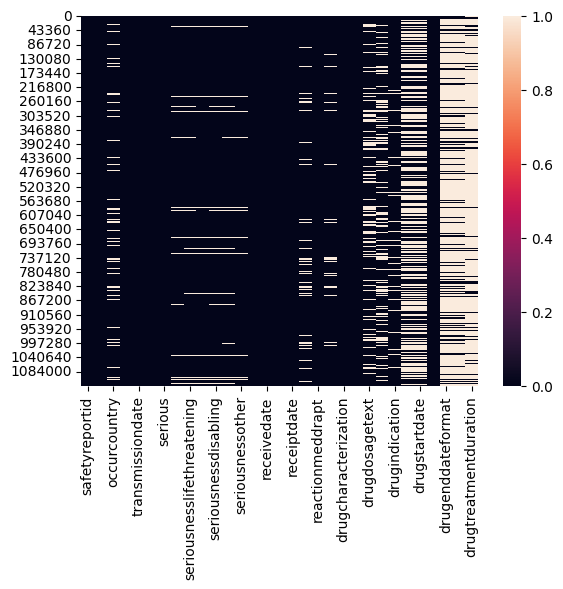

In [7]:
sns.heatmap(new_df.isnull())

In [8]:
df.drop(["drugadministrationroute","drugbatchnumb","literaturereference","drugrecurreadministration","authoritynumb"],inplace = True,axis = 1)

In [9]:
df.head()

,Unnamed: 0,safetyreportversion,safetyreportid,primarysourcecountry,occurcountry,transmissiondateformat,transmissiondate,reporttype,serious,seriousnessdeath,...,duplicate,reportduplicate,drugenddateformat,drugenddate,drugtreatmentduration,drugtreatmentdurationunit,drugadditional,drugcumulativedosagenumb,drugcumulativedosageunit,drugrecurrence
0,0,12,20967838,US,US,102,20240410,1.0,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,21013578,US,US,102,20240410,2.0,2,2.0,...,1.0,"[{'duplicatesource': 'SA', 'duplicatenumb': 'U...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,21054793,US,US,102,20240410,1.0,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2,21131542,CO,CO,102,20240410,2.0,1,2.0,...,1.0,"[{'duplicatesource': '22', 'duplicatenumb': 'C...",102.0,20231221.0,470.0,804.0,3.0,NaN,NaN,NaN
4,4,10,21192965,CA,NaN,102,20240410,3.0,1,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN


<Axes: >

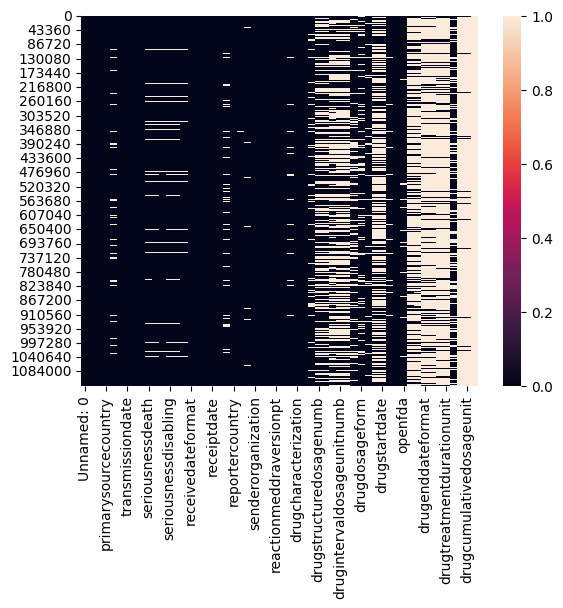

In [10]:
sns.heatmap(df.isnull())

In [11]:
new_df = df[["drugindication","reactionmeddrapt","medicinalproduct"]]

In [12]:
new_df.head()

,drugindication,reactionmeddrapt,medicinalproduct
0,Cardiac amyloidosis,Fatigue,VYNDAMAX
1,Dermatitis atopic,General physical health deterioration,DUPILUMAB
2,Dry eye,Stress,SYSTANE (HYPROMELLOSE 2910 (4000 MPA.S))
3,Diabetes mellitus,Off label use,INSULIN NOS
4,Relapsing-remitting multiple sclerosis,Frustration tolerance decreased,OCREVUS


<Axes: >

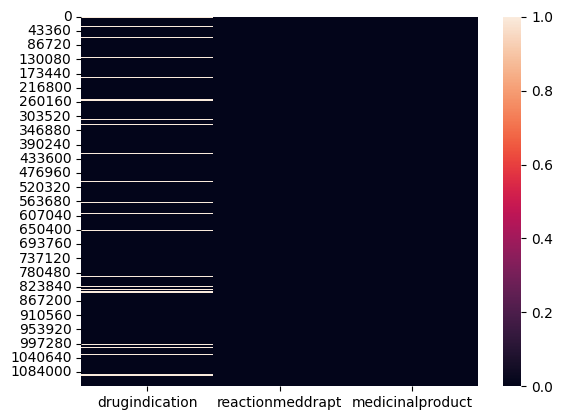

In [13]:
sns.heatmap(new_df.isnull())

In [14]:
new_df.dropna(inplace = True)

C:\Users\Akshay\AppData\Local\Temp\ipykernel_5632\117842389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace = True)


## Reaction Outcome

In [26]:
df.groupby("reactionoutcome").count()

,Unnamed: 0,safetyreportversion,safetyreportid,primarysourcecountry,occurcountry,transmissiondateformat,transmissiondate,reporttype,serious,seriousnessdeath,...,duplicate,reportduplicate,drugenddateformat,drugenddate,drugtreatmentduration,drugtreatmentdurationunit,drugadditional,drugcumulativedosagenumb,drugcumulativedosageunit,drugrecurrence
reactionoutcome,,,,,,,,,,,,,,,,,,,,,
1.0,134342,134342,134342,134196,128671,134342,134342,134339,134342,126645,...,44517,44388,56757,56757,46156,46156,110009,12404,12404,4
2.0,67003,67003,67003,66939,63947,67003,67003,66999,67003,63169,...,26652,26589,27995,27995,22326,22326,55692,7284,7284,2
3.0,103633,103633,103633,103586,99387,103633,103633,103633,103633,98258,...,30712,30581,29456,29456,21411,21411,74299,4531,4531,0
4.0,2814,2814,2814,2811,2668,2814,2814,2814,2814,2667,...,1335,1333,1587,1587,1316,1316,2405,391,391,0
5.0,55933,55933,55933,55890,48845,55933,55933,55930,55933,55933,...,17774,17702,9519,9519,7692,7692,52181,2067,2067,0
6.0,717571,717571,717571,717036,678782,717571,717571,717449,717571,685888,...,212301,209884,100721,100721,67950,67950,538410,10464,10464,10


In [21]:
values = df.groupby("reactionoutcome").count()["Unnamed: 0"].values
index = df.groupby("reactionoutcome").count()["Unnamed: 0"].index

In [44]:
df[df["reactionoutcome"] == 3].groupby("reactionmeddrapt").count().index[100:]

Index(['Adenocarcinoma of colon', 'Adenocarcinoma pancreas', 'Adenoma benign',
       'Adenomyosis', 'Adenovirus infection', 'Adhesion',
       'Adjusted calcium increased', 'Adjustment disorder',
       'Adjustment disorder with depressed mood',
       'Administration site discolouration',
       ...
       'Wrong drug', 'Wrong product administered',
       'Wrong technique in device usage process',
       'Wrong technique in product usage process', 'X-ray abnormal',
       'Xerophthalmia', 'Xerosis', 'Yellow skin', 'pH body fluid abnormal',
       'pH urine decreased'],
      dtype='object', name='reactionmeddrapt', length=4880)

Text(0.5, 1.0, 'Reaction Clustered')

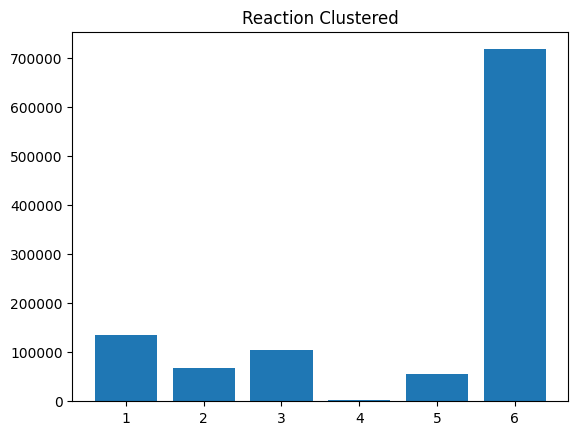

In [25]:
plt.bar(index,values)
plt.title('Reaction Clustered')

### Most Common Drug Indication

In [76]:
gk = new_df.groupby('drugindication')

In [77]:
unique_drugindication = gk.first().index

In [78]:
count_reaction = {}
for drug in unique_drugindication:
    count_reaction[drug] = len(gk.get_group(drug))

In [79]:
res = dict(sorted(count_reaction.items(), key = lambda x: x[1], reverse = True)[1:11])

In [80]:
res

{'Rheumatoid arthritis': 2881,
 'Plasma cell myeloma': 2085,
 'Asthma': 2011,
 'Dermatitis atopic': 1942,
 'Type 2 diabetes mellitus': 1886,
 'Crohn^s disease': 1786,
 'Colitis ulcerative': 1502,
 'Multiple sclerosis': 1325,
 'Hypertension': 994,
 'Psoriasis': 974}

C:\Users\Akshay\AppData\Local\Temp\ipykernel_3820\3495198209.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(res.keys(), rotation = 90)


<Figure size 1000x600 with 0 Axes>

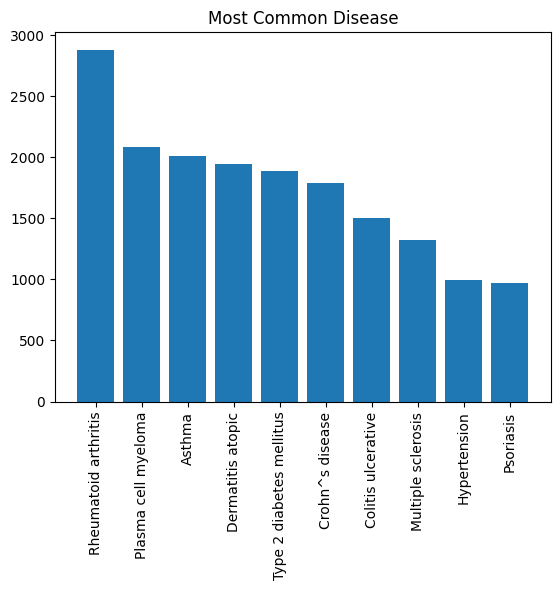

In [81]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots() 
# Creating plot
ax.bar(res.keys(),res.values())
 
# Rotating X-axis labels
ax.set_xticklabels(res.keys(), rotation = 90)
 
# Setting title
plt.title('Most Common Disease')
 
# Show plot
plt.show()


### Most Common Medicinal Product

In [82]:
gk = new_df.groupby('medicinalproduct')
unique_reactionmeddrapt = gk.first().index
count_reaction = {}
for drug in unique_reactionmeddrapt:
    count_reaction[drug] = len(gk.get_group(drug))
res = dict(sorted(count_reaction.items(), key = lambda x: x[1], reverse = True)[:10])

C:\Users\Akshay\AppData\Local\Temp\ipykernel_3820\1305074406.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(res.keys(), rotation = 90)


<Figure size 1000x600 with 0 Axes>

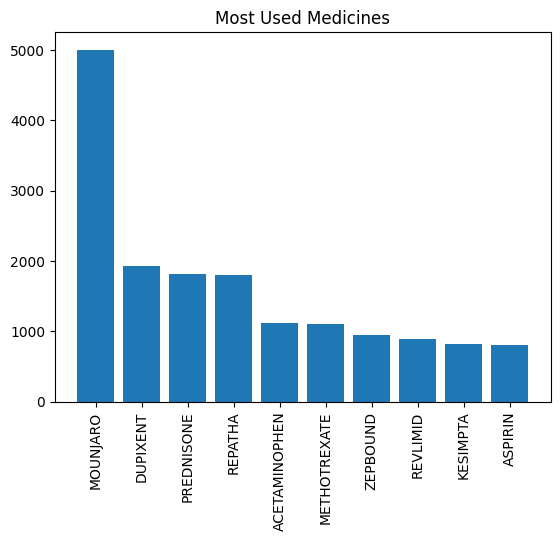

In [83]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots() 
# Creating plot
ax.bar(res.keys(),res.values())
 
# Rotating X-axis labels
ax.set_xticklabels(res.keys(), rotation = 90)
 
# Setting title
plt.title('Most Used Medicines')
 
# Show plot
plt.show()


### Most Common Drugs Reaction

In [84]:
gk = new_df.groupby('reactionmeddrapt')
unique_reactionmeddrapt = gk.first().index
count_reaction = {}
for drug in unique_reactionmeddrapt:
    count_reaction[drug] = len(gk.get_group(drug))
res = dict(sorted(count_reaction.items(), key = lambda x: x[1], reverse = True)[8:18])

C:\Users\Akshay\AppData\Local\Temp\ipykernel_3820\2827971138.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(res.keys(), rotation = 90)


<Figure size 1000x600 with 0 Axes>

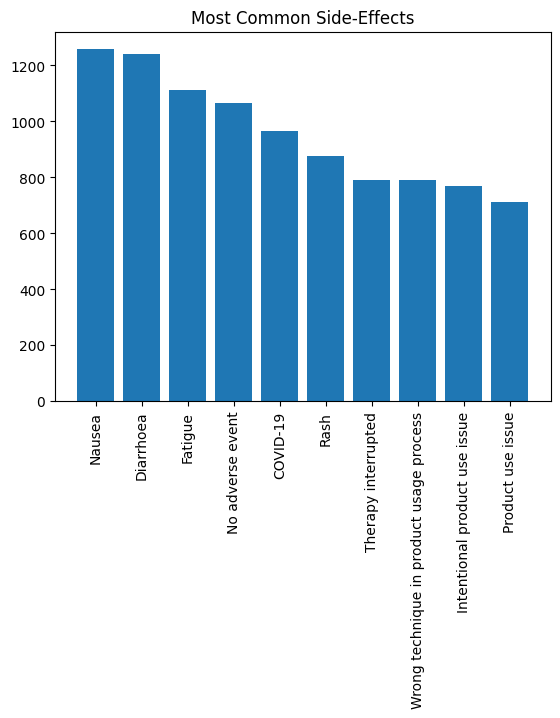

In [85]:
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots() 
# Creating plot
ax.bar(res.keys(),res.values())
 
# Rotating X-axis labels
ax.set_xticklabels(res.keys(), rotation = 90)
 
# Setting title
plt.title('Most Common Side-Effects')
 
# Show plot
plt.show()
